# **Data Science Project --- Crime**




Crime Datasets Downloaded from: 

https://catalog.data.gov/dataset/crime-data-from-2010-to-2019

In [1]:
# Libraries
import numpy as np
import pandas as pd
import math
import re
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from pylab import rcParams
import json
import requests
import glob, os
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import mannwhitneyu
import random
import subprocess
import os
from sklearn import preprocessing
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
rcParams['figure.figsize'] = 12, 6
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Load Data

In [2]:
crime = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DS Project Data/Crime_Data_from_2010_to_2019.csv')

In [3]:
crime.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,1307355,02/20/2010 12:00:00 AM,02/20/2010 12:00:00 AM,1350,13,Newton,1385,2,900,VIOLATION OF COURT ORDER,0913 1814 2000,48,M,H,501.0,SINGLE FAMILY DWELLING,NaN,NaN,AA,Adult Arrest,900.0,NaN,NaN,NaN,300 E GAGE AV,NaN,33.9825,-118.2695
1,11401303,09/13/2010 12:00:00 AM,09/12/2010 12:00:00 AM,45,14,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,0,M,W,101.0,STREET,NaN,NaN,IC,Invest Cont,740.0,NaN,NaN,NaN,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962
2,70309629,08/09/2010 12:00:00 AM,08/09/2010 12:00:00 AM,1515,13,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,0344,0,M,H,103.0,ALLEY,NaN,NaN,IC,Invest Cont,946.0,NaN,NaN,NaN,1300 E 21ST ST,NaN,34.0224,-118.2524
3,90631215,01/05/2010 12:00:00 AM,01/05/2010 12:00:00 AM,150,6,Hollywood,646,2,900,VIOLATION OF COURT ORDER,1100 0400 1402,47,F,W,101.0,STREET,102.0,HAND GUN,IC,Invest Cont,900.0,998.0,NaN,NaN,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295
4,100100501,01/03/2010 12:00:00 AM,01/02/2010 12:00:00 AM,2100,1,Central,176,1,122,"RAPE, ATTEMPTED",0400,47,F,H,103.0,ALLEY,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,122.0,NaN,NaN,NaN,8TH ST,SAN PEDRO ST,34.0387,-118.2488


In [4]:
crime.tail()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
2116839,190608903,03/28/2019 12:00:00 AM,03/28/2019 12:00:00 AM,400,6,Hollywood,644,1,648,ARSON,0601 1501,0,X,X,706.0,SEX ORIENTED/BOOK STORE/STRIP CLUB/GENTLEMAN'S...,506.0,FIRE,IC,Invest Cont,648.0,NaN,NaN,NaN,1400 N LA BREA AV,NaN,34.0962,-118.3490
2116840,190715222,08/15/2019 12:00:00 AM,08/14/2019 12:00:00 AM,1810,7,Wilshire,701,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($400 AND OVER),1300 0344,40,M,W,101.0,STREET,NaN,NaN,IC,Invest Cont,331.0,NaN,NaN,NaN,WILLOUGHBY AV,ORLANDO AV,34.0871,-118.3732
2116841,192004409,01/06/2019 12:00:00 AM,01/06/2019 12:00:00 AM,2100,20,Olympic,2029,2,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,0432 0421 0340 0305 0444 0429 0537 1218 0216,46,F,B,102.0,SIDEWALK,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,930.0,NaN,NaN,NaN,6TH,VIRGIL,34.0637,-118.2870
2116842,191716777,10/17/2019 12:00:00 AM,10/16/2019 12:00:00 AM,1800,17,Devonshire,1795,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),NaN,0,NaN,NaN,101.0,STREET,NaN,NaN,IC,Invest Cont,420.0,NaN,NaN,NaN,17200 NAPA ST,NaN,34.2266,-118.5085
2116843,190805435,02/01/2019 12:00:00 AM,02/01/2019 12:00:00 AM,1615,8,West LA,852,1,330,BURGLARY FROM VEHICLE,1302 1609 0358 1307 0344 0377 0321,33,F,W,707.0,GARAGE/CARPORT,NaN,NaN,IC,Invest Cont,330.0,NaN,NaN,NaN,1700 BARRY AV,NaN,34.0420,-118.4531


In [5]:
# DF Shape & Size
print("Crime Shape: ", crime.shape)
print("Crime Size: ", crime.size)

Crime Shape:  (2116844, 28)
Crime Size:  59271632


In [6]:
# DF Columns name
print(crime.columns)

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA ', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')


In [7]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2116844 entries, 0 to 2116843
Data columns (total 28 columns):
 #   Column          Dtype  
---  ------          -----  
 0   DR_NO           int64  
 1   Date Rptd       object 
 2   DATE OCC        object 
 3   TIME OCC        int64  
 4   AREA            int64  
 5   AREA NAME       object 
 6   Rpt Dist No     int64  
 7   Part 1-2        int64  
 8   Crm Cd          int64  
 9   Crm Cd Desc     object 
 10  Mocodes         object 
 11  Vict Age        int64  
 12  Vict Sex        object 
 13  Vict Descent    object 
 14  Premis Cd       float64
 15  Premis Desc     object 
 16  Weapon Used Cd  float64
 17  Weapon Desc     object 
 18  Status          object 
 19  Status Desc     object 
 20  Crm Cd 1        float64
 21  Crm Cd 2        float64
 22  Crm Cd 3        float64
 23  Crm Cd 4        float64
 24  LOCATION        object 
 25  Cross Street    object 
 26  LAT             float64
 27  LON             float64
dtypes: float64(8

In [8]:
crime.isnull().any()

DR_NO             False
Date Rptd         False
DATE OCC          False
TIME OCC          False
AREA              False
AREA NAME         False
Rpt Dist No       False
Part 1-2          False
Crm Cd            False
Crm Cd Desc       False
Mocodes            True
Vict Age          False
Vict Sex           True
Vict Descent       True
Premis Cd          True
Premis Desc        True
Weapon Used Cd     True
Weapon Desc        True
Status             True
Status Desc       False
Crm Cd 1           True
Crm Cd 2           True
Crm Cd 3           True
Crm Cd 4           True
LOCATION          False
Cross Street       True
LAT               False
LON               False
dtype: bool

# Preprocessing/Visualization

#### Strip white space

In [9]:
# crime columns names
crime['Date Rptd'] = crime['Date Rptd'].str.strip()
crime['DATE OCC'] = crime['DATE OCC'].str.strip()
crime['AREA NAME'] = crime['AREA NAME'].str.strip()
crime['Crm Cd Desc'] = crime['Crm Cd Desc'].str.strip()
crime['Mocodes'] = crime['Mocodes'].str.strip()
crime['Vict Sex'] = crime['Vict Sex'].str.strip()
crime['Vict Descent'] = crime['Vict Descent'].str.strip()
crime['Premis Desc'] = crime['Premis Desc'].str.strip()
crime['Weapon Desc'] = crime['Weapon Desc'].str.strip()
crime['Status'] = crime['Status'].str.strip()
crime['Status Desc'] = crime['Status Desc'].str.strip()
crime['LOCATION'] = crime['LOCATION'].str.strip()
crime['Cross Street'] = crime['Cross Street'].str.strip()

### Date of Crime Reported and Crime Occurred

In [10]:
# Spliting Crime Reported
crime['DATE-TIME-Rptd'] = crime['Date Rptd'].str.split()
crime['Date Reported'] = crime['DATE-TIME-Rptd'].apply(lambda x: x[0])
crime['Time Reported'] = crime['DATE-TIME-Rptd'].apply(lambda x: x[1])

# Spliting Crime Occurred
crime['DATE-TIME-OCC'] = crime['DATE OCC'].str.split()
crime['Date Occured'] = crime['DATE-TIME-OCC'].apply(lambda x: x[0])
crime['Time Occured'] = crime['DATE-TIME-OCC'].apply(lambda x: x[1])

crime.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,DATE-TIME-Rptd,Date Reported,Time Reported,DATE-TIME-OCC,Date Occured,Time Occured
0,1307355,02/20/2010 12:00:00 AM,02/20/2010 12:00:00 AM,1350,13,Newton,1385,2,900,VIOLATION OF COURT ORDER,0913 1814 2000,48,M,H,501.0,SINGLE FAMILY DWELLING,NaN,NaN,AA,Adult Arrest,900.0,NaN,NaN,NaN,300 E GAGE AV,NaN,33.9825,-118.2695,"[02/20/2010, 12:00:00, AM]",02/20/2010,12:00:00,"[02/20/2010, 12:00:00, AM]",02/20/2010,12:00:00
1,11401303,09/13/2010 12:00:00 AM,09/12/2010 12:00:00 AM,45,14,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,0,M,W,101.0,STREET,NaN,NaN,IC,Invest Cont,740.0,NaN,NaN,NaN,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962,"[09/13/2010, 12:00:00, AM]",09/13/2010,12:00:00,"[09/12/2010, 12:00:00, AM]",09/12/2010,12:00:00
2,70309629,08/09/2010 12:00:00 AM,08/09/2010 12:00:00 AM,1515,13,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,0344,0,M,H,103.0,ALLEY,NaN,NaN,IC,Invest Cont,946.0,NaN,NaN,NaN,1300 E 21ST ST,NaN,34.0224,-118.2524,"[08/09/2010, 12:00:00, AM]",08/09/2010,12:00:00,"[08/09/2010, 12:00:00, AM]",08/09/2010,12:00:00
3,90631215,01/05/2010 12:00:00 AM,01/05/2010 12:00:00 AM,150,6,Hollywood,646,2,900,VIOLATION OF COURT ORDER,1100 0400 1402,47,F,W,101.0,STREET,102.0,HAND GUN,IC,Invest Cont,900.0,998.0,NaN,NaN,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295,"[01/05/2010, 12:00:00, AM]",01/05/2010,12:00:00,"[01/05/2010, 12:00:00, AM]",01/05/2010,12:00:00
4,100100501,01/03/2010 12:00:00 AM,01/02/2010 12:00:00 AM,2100,1,Central,176,1,122,"RAPE, ATTEMPTED",0400,47,F,H,103.0,ALLEY,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,122.0,NaN,NaN,NaN,8TH ST,SAN PEDRO ST,34.0387,-118.2488,"[01/03/2010, 12:00:00, AM]",01/03/2010,12:00:00,"[01/02/2010, 12:00:00, AM]",01/02/2010,12:00:00


In [11]:
# Converting to date time Crime Occurred
crime['Date Occured'] = pd.to_datetime(crime['Date Occured'], format="%m/%d/%Y")
# crime['Date Occured'] = crime['Date Occured'].dt.strftime('%m/%d/%Y')
crime['Time Occured'] = pd.to_datetime(crime['Time Occured'], format="%H:%M:%S")
# crime['Time Occured'] = crime['Time Occured'].dt.strftime('%H:%M:%S')

# Converting to date time Crime Reported
crime['Date Reported'] = pd.to_datetime(crime['Date Reported'], format="%m/%d/%Y")
# crime['Date Reported'] = crime['Date Reported'].dt.strftime('%m/%d/%Y')
crime['Time Reported'] = pd.to_datetime(crime['Time Reported'], format="%H:%M:%S")
# crime['Time Reported'] = crime['Time Reported'].dt.strftime('%H:%M:%S')

crime['Year'] = crime['Date Occured'].dt.strftime('%Y')

crime.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,DATE-TIME-Rptd,Date Reported,Time Reported,DATE-TIME-OCC,Date Occured,Time Occured,Year
0,1307355,02/20/2010 12:00:00 AM,02/20/2010 12:00:00 AM,1350,13,Newton,1385,2,900,VIOLATION OF COURT ORDER,0913 1814 2000,48,M,H,501.0,SINGLE FAMILY DWELLING,NaN,NaN,AA,Adult Arrest,900.0,NaN,NaN,NaN,300 E GAGE AV,NaN,33.9825,-118.2695,"[02/20/2010, 12:00:00, AM]",2010-02-20,1900-01-01 12:00:00,"[02/20/2010, 12:00:00, AM]",2010-02-20,1900-01-01 12:00:00,2010
1,11401303,09/13/2010 12:00:00 AM,09/12/2010 12:00:00 AM,45,14,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,0,M,W,101.0,STREET,NaN,NaN,IC,Invest Cont,740.0,NaN,NaN,NaN,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962,"[09/13/2010, 12:00:00, AM]",2010-09-13,1900-01-01 12:00:00,"[09/12/2010, 12:00:00, AM]",2010-09-12,1900-01-01 12:00:00,2010
2,70309629,08/09/2010 12:00:00 AM,08/09/2010 12:00:00 AM,1515,13,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,0344,0,M,H,103.0,ALLEY,NaN,NaN,IC,Invest Cont,946.0,NaN,NaN,NaN,1300 E 21ST ST,NaN,34.0224,-118.2524,"[08/09/2010, 12:00:00, AM]",2010-08-09,1900-01-01 12:00:00,"[08/09/2010, 12:00:00, AM]",2010-08-09,1900-01-01 12:00:00,2010
3,90631215,01/05/2010 12:00:00 AM,01/05/2010 12:00:00 AM,150,6,Hollywood,646,2,900,VIOLATION OF COURT ORDER,1100 0400 1402,47,F,W,101.0,STREET,102.0,HAND GUN,IC,Invest Cont,900.0,998.0,NaN,NaN,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295,"[01/05/2010, 12:00:00, AM]",2010-01-05,1900-01-01 12:00:00,"[01/05/2010, 12:00:00, AM]",2010-01-05,1900-01-01 12:00:00,2010
4,100100501,01/03/2010 12:00:00 AM,01/02/2010 12:00:00 AM,2100,1,Central,176,1,122,"RAPE, ATTEMPTED",0400,47,F,H,103.0,ALLEY,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,122.0,NaN,NaN,NaN,8TH ST,SAN PEDRO ST,34.0387,-118.2488,"[01/03/2010, 12:00:00, AM]",2010-01-03,1900-01-01 12:00:00,"[01/02/2010, 12:00:00, AM]",2010-01-02,1900-01-01 12:00:00,2010


In [12]:
# Droping Columns DATE-TIME-Rptd, DATE-TIME-OCC, Date Rptd, DATE OCC
crime = crime.drop(columns=['DATE-TIME-OCC', 'DATE-TIME-Rptd', 'Date Rptd', 'DATE OCC'])
crime.head()

,DR_NO,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,Date Reported,Time Reported,Date Occured,Time Occured,Year
0,1307355,1350,13,Newton,1385,2,900,VIOLATION OF COURT ORDER,0913 1814 2000,48,M,H,501.0,SINGLE FAMILY DWELLING,NaN,NaN,AA,Adult Arrest,900.0,NaN,NaN,NaN,300 E GAGE AV,NaN,33.9825,-118.2695,2010-02-20,1900-01-01 12:00:00,2010-02-20,1900-01-01 12:00:00,2010
1,11401303,45,14,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,0,M,W,101.0,STREET,NaN,NaN,IC,Invest Cont,740.0,NaN,NaN,NaN,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962,2010-09-13,1900-01-01 12:00:00,2010-09-12,1900-01-01 12:00:00,2010
2,70309629,1515,13,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,0344,0,M,H,103.0,ALLEY,NaN,NaN,IC,Invest Cont,946.0,NaN,NaN,NaN,1300 E 21ST ST,NaN,34.0224,-118.2524,2010-08-09,1900-01-01 12:00:00,2010-08-09,1900-01-01 12:00:00,2010
3,90631215,150,6,Hollywood,646,2,900,VIOLATION OF COURT ORDER,1100 0400 1402,47,F,W,101.0,STREET,102.0,HAND GUN,IC,Invest Cont,900.0,998.0,NaN,NaN,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295,2010-01-05,1900-01-01 12:00:00,2010-01-05,1900-01-01 12:00:00,2010
4,100100501,2100,1,Central,176,1,122,"RAPE, ATTEMPTED",0400,47,F,H,103.0,ALLEY,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,122.0,NaN,NaN,NaN,8TH ST,SAN PEDRO ST,34.0387,-118.2488,2010-01-03,1900-01-01 12:00:00,2010-01-02,1900-01-01 12:00:00,2010


In [13]:
meanOfAge = math.trunc(crime['Vict Age'][(crime['Vict Age'] > 0)].mean())
crime['Vict Age'] = crime['Vict Age'].replace(crime['Vict Age'][(crime['Vict Age'] <= 0)].unique(), meanOfAge)
crime.head()

,DR_NO,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,Date Reported,Time Reported,Date Occured,Time Occured,Year
0,1307355,1350,13,Newton,1385,2,900,VIOLATION OF COURT ORDER,0913 1814 2000,48,M,H,501.0,SINGLE FAMILY DWELLING,NaN,NaN,AA,Adult Arrest,900.0,NaN,NaN,NaN,300 E GAGE AV,NaN,33.9825,-118.2695,2010-02-20,1900-01-01 12:00:00,2010-02-20,1900-01-01 12:00:00,2010
1,11401303,45,14,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,38,M,W,101.0,STREET,NaN,NaN,IC,Invest Cont,740.0,NaN,NaN,NaN,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962,2010-09-13,1900-01-01 12:00:00,2010-09-12,1900-01-01 12:00:00,2010
2,70309629,1515,13,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,0344,38,M,H,103.0,ALLEY,NaN,NaN,IC,Invest Cont,946.0,NaN,NaN,NaN,1300 E 21ST ST,NaN,34.0224,-118.2524,2010-08-09,1900-01-01 12:00:00,2010-08-09,1900-01-01 12:00:00,2010
3,90631215,150,6,Hollywood,646,2,900,VIOLATION OF COURT ORDER,1100 0400 1402,47,F,W,101.0,STREET,102.0,HAND GUN,IC,Invest Cont,900.0,998.0,NaN,NaN,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295,2010-01-05,1900-01-01 12:00:00,2010-01-05,1900-01-01 12:00:00,2010
4,100100501,2100,1,Central,176,1,122,"RAPE, ATTEMPTED",0400,47,F,H,103.0,ALLEY,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,122.0,NaN,NaN,NaN,8TH ST,SAN PEDRO ST,34.0387,-118.2488,2010-01-03,1900-01-01 12:00:00,2010-01-02,1900-01-01 12:00:00,2010


### Victims (Age, Sex and Descent)

In [14]:
# Select the Columns with Victim's Age, Sex and Descent.
victim = crime[['Vict Age', 'Vict Sex', 'Vict Descent']]
# Is Age a Factor ?
# Does People from certain Descent being target the most ?
# Are Female being targeted more then Males?
# We gonna find out the Answer to these kind of Questions.

In [15]:
victim.isnull().any()

Vict Age        False
Vict Sex         True
Vict Descent     True
dtype: bool

In [16]:
victim['Vict Sex'].unique()

array(['M', 'F', nan, 'X', 'H', '-', 'N'], dtype=object)

(array([1.02830e+04, 1.78450e+04, 5.80160e+04, 1.42153e+05, 2.29486e+05,
        2.27706e+05, 2.02106e+05, 5.44480e+05, 1.57805e+05, 1.48871e+05,
        1.25484e+05, 9.48310e+04, 6.36260e+04, 3.94630e+04, 2.34320e+04,
        1.48950e+04, 8.87700e+03, 4.67500e+03, 1.71200e+03, 1.09600e+03,
        0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([  2,   7,  12,  17,  22,  27,  32,  37,  42,  47,  52,  57,  62,
         67,  72,  77,  82,  87,  92,  97, 102, 107, 112, 117]),
 <a list of 23 Patch objects>)

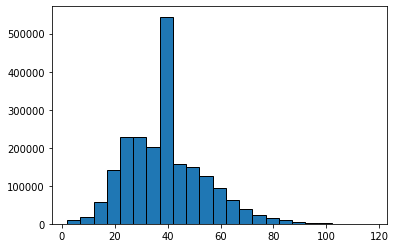

In [17]:
bins = np.arange(victim['Vict Age'].min(), victim['Vict Age'].max(), 5)
plt.hist(victim['Vict Age'].dropna(), bins=bins, alpha=1, edgecolor='black')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


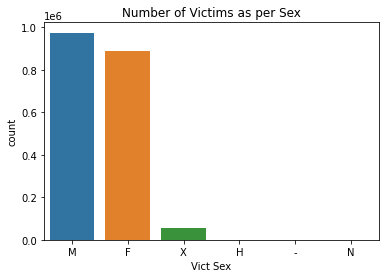

In [18]:
plt.title('Number of Victims as per Sex')
sns.countplot('Vict Sex', data=victim)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


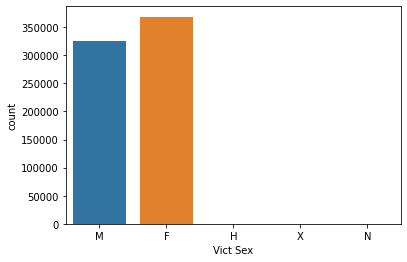

In [19]:
# Number of Victims according to Sex of the Victim b/w the age group 20 and 35 years
sns.countplot('Vict Sex', data=victim[(victim['Vict Age'] >= 20) & (victim['Vict Age'] <= 35)])

##### As we can see, Females in the age group 20-35 Years are being targeted more.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


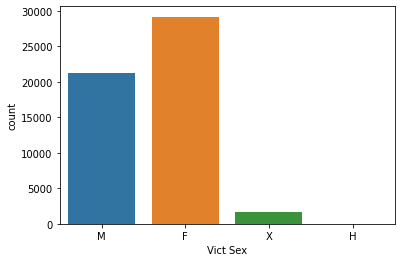

In [20]:
# Number of Victims according to Sex of the Victim b/w the age group 10 and 15 years
sns.countplot('Vict Sex', data=victim[(victim['Vict Age'] >= 10) & (victim['Vict Age'] <= 15)])

##### Boys in their have been target more much more

In [21]:
victim['Vict Descent'].unique()

array(['H', 'W', 'B', 'A', 'O', 'X', 'K', nan, 'I', 'J', 'F', 'C', 'P',
       'V', 'U', 'G', 'D', 'S', 'Z', 'L', '-'], dtype=object)

In [22]:
# Changing the abbreviations to the whole description
Victims_bg = {
      "A": "Other Asian",
      "B": "Black",
      "C": "Chinese",
      "D": "Cambodian",
      "F": "Filipino",
      "G": "Guamanian",
      "H": "Hispanic/Latin/Mexican",
      "I": "American Indian/Alaskan Native",
      "J": "Japanese",
      "K": "Korean",
      "L": "Laotian",
      "O": "Other",
      "P": "Pacific Islander",
      "S": "Samoan",
      "U": "Hawaiian",
      "V": "Vietnamese",
      "W": "White",
      "X": "Unknown",
      "Z": "Asian Indian"
  }

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


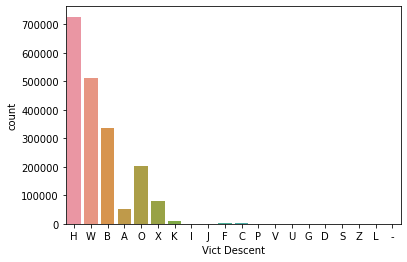

In [23]:
sns.countplot('Vict Descent', data=victim)

##### People who were from the Descent H have been targeted the most followed by W and B.

In [24]:
# Droping Columns if value nan
crime = crime.dropna(subset=['Vict Sex', 'Vict Descent'])

In [25]:
crime.shape

(1920078, 31)

### Victim Age

In [26]:
# Basic stats about Victim Age
crime["Vict Age"].describe()[1:]

mean    38.457816
std     15.293714
min      2.000000
25%     27.000000
50%     38.000000
75%     48.000000
max     99.000000
Name: Vict Age, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


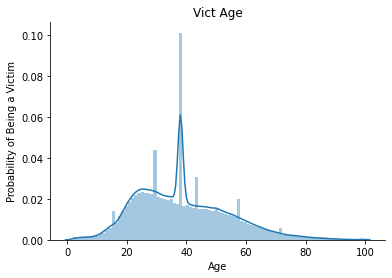

In [27]:
fig, ax = plt.subplots()
# Plotting victim's age distribution
sns.distplot(crime["Vict Age"].dropna(), bins=90, ax=ax)
# Axes
ax.set_title("Vict Age")
ax.set_xlabel("Age")
ax.set_ylabel("Probability of Being a Victim")
sns.despine()

### Victim Sex

In [28]:
crime['Vict Sex'].value_counts()

M    975036
F    889747
X     55205
H        72
N        17
-         1
Name: Vict Sex, dtype: int64

In [29]:
crime['Vict Sex'] = crime["Vict Sex"].replace(['H', 'N','-'], 'X')
crime['Vict Sex'].value_counts()

M    975036
F    889747
X     55295
Name: Vict Sex, dtype: int64

In [30]:
crime = crime[crime['Vict Sex'].notnull()]
crime.shape

(1920078, 31)

### Area Name and Victim Sex

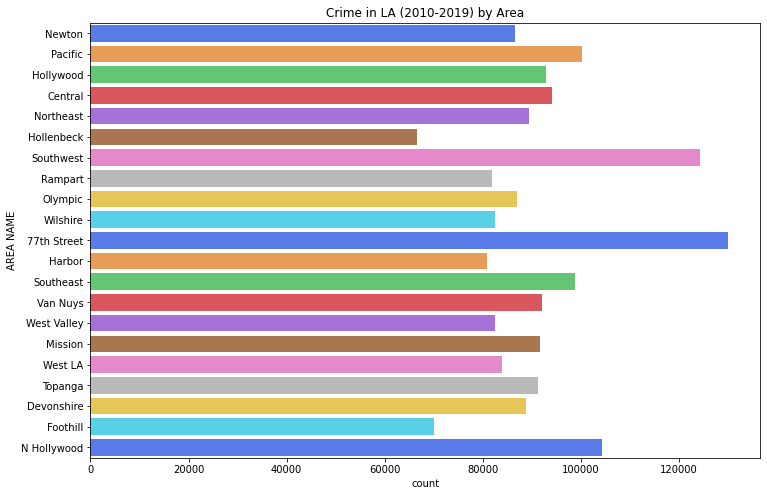

In [31]:
# First let's visualize the number of crimes according to area name
fig,ax = plt.subplots(figsize=(12,8))
sns.countplot(y="AREA NAME",data=crime,palette='bright',alpha=0.75)
ax.set_title('Crime in LA (2010-2019) by Area');

In [32]:
# We only look at crime data from the 10 highest crime areas
areas = [area for area in crime['AREA NAME'].value_counts().head(10).reset_index()['index']]
df2 = pd.DataFrame()
for area in areas:
    df2 = pd.concat([df2, crime[crime['AREA NAME'] == area]], axis=0)
df2.head()

,DR_NO,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,Date Reported,Time Reported,Date Occured,Time Occured,Year
9737,100210550,1200,12,77th Street,1265,2,354,THEFT OF IDENTITY,0377,40,M,H,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,354.0,NaN,NaN,NaN,1200 W 84TH ST,NaN,33.9628,-118.2959,2010-04-27,1900-01-01 12:00:00,2010-03-27,1900-01-01 12:00:00,2010
19771,100311919,100,12,77th Street,1232,1,510,VEHICLE - STOLEN,0344 0913,46,M,B,101.0,STREET,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,510.0,NaN,NaN,NaN,3300 W 59TH ST,NaN,33.9872,-118.3296,2010-04-26,1900-01-01 12:00:00,2010-04-26,1900-01-01 12:00:00,2010
24262,100320860,2350,12,77th Street,1232,1,210,ROBBERY,0334 0400 0916 1402,22,F,B,101.0,STREET,102.0,HAND GUN,IC,Invest Cont,210.0,998.0,NaN,NaN,4TH,SLAUSON,33.9891,-118.3216,2010-08-30,1900-01-01 12:00:00,2010-08-29,1900-01-01 12:00:00,2010
25724,100323768,800,12,77th Street,1253,2,354,THEFT OF IDENTITY,0377,40,M,B,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,354.0,NaN,NaN,NaN,2100 W 79TH ST,NaN,33.9673,-118.3156,2010-10-12,1900-01-01 12:00:00,2010-10-10,1900-01-01 12:00:00,2010
30081,101218221,2030,12,77th Street,1268,1,310,BURGLARY,0344 1609,38,M,B,710.0,OTHER PREMISE,NaN,NaN,IC,Invest Cont,310.0,NaN,NaN,NaN,8500 S BROADWAY,NaN,33.9616,-118.2782,2010-07-03,1900-01-01 12:00:00,2010-07-02,1900-01-01 12:00:00,2010


In [33]:
df2['AREA NAME'].value_counts() # Checks out

77th Street    130042
Southwest      124364
N Hollywood    104370
Pacific        100248
Southeast       98709
Central         94145
Hollywood       92898
Van Nuys        92014
Mission         91691
Topanga         91307
Name: AREA NAME, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


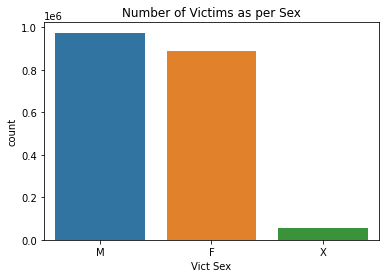

In [34]:
plt.title('Number of Victims as per Sex')
sns.countplot('Vict Sex', data=crime)

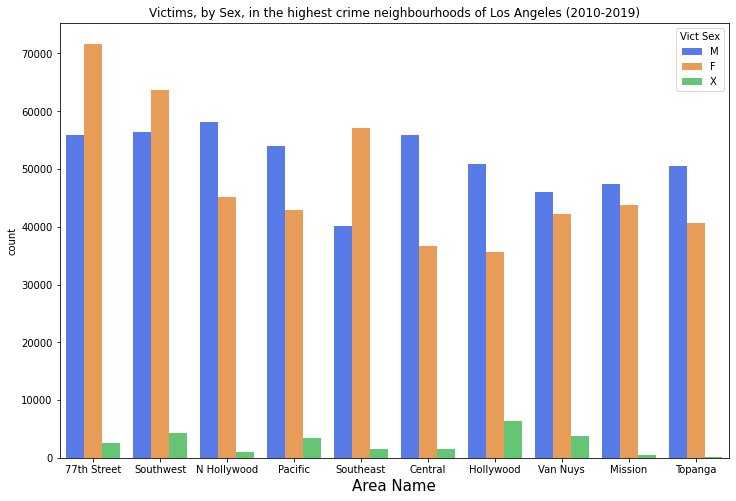

In [35]:
fig,ax = plt.subplots(figsize=(12,8))
sns.countplot(x='AREA NAME',hue='Vict Sex',data=df2,palette='bright',alpha=0.75)
ax.set_title('Victims, by Sex, in the highest crime neighbourhoods of Los Angeles (2010-2019)')
ax.set_xlabel('Area Name', fontsize=15);

In [36]:
# Area ID, Area Name and Reporting District No.
area = crime[['AREA ', 'AREA NAME', 'Rpt Dist No']]

In [37]:
area.isnull().any()

AREA           False
AREA NAME      False
Rpt Dist No    False
dtype: bool

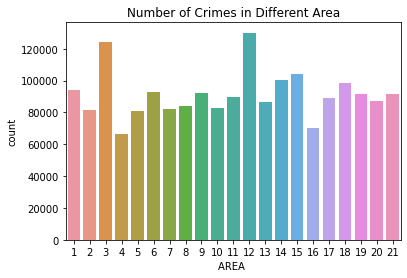

In [38]:
# Which area have more Crime.
plt.title('Number of Crimes in Different Area')
sns.countplot(x='AREA ', data=area)

###### Area ID 12 is 77th Street Area ID 3 is Southwest

## Crime

In [39]:
# Now we know Area with the ID 12 and 3 have the Highest Number of Crime Rates now find type of crimes are more common in these areas.
# Crime Code and it's Description
crime_df = crime[['Crm Cd', 'Crm Cd Desc']]

In [40]:
# Checking NULL Values.
crime_df.isnull().any()

Crm Cd         False
Crm Cd Desc    False
dtype: bool

In [41]:
# These are overall Top 10 Crimes.
crime_df['Crm Cd Desc'].value_counts()[:10]

BATTERY - SIMPLE ASSAULT                                   190512
BURGLARY FROM VEHICLE                                      162152
THEFT PLAIN - PETTY ($950 & UNDER)                         149803
BURGLARY                                                   147642
THEFT OF IDENTITY                                          127767
INTIMATE PARTNER - SIMPLE ASSAULT                          114541
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)    109420
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT              92681
VANDALISM - MISDEAMEANOR ($399 OR UNDER)                    90404
ROBBERY                                                     83813
Name: Crm Cd Desc, dtype: int64

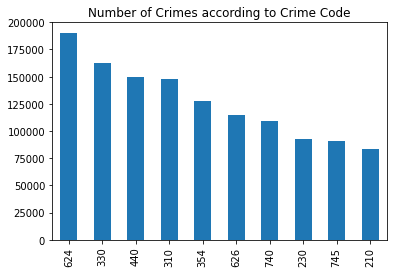

In [42]:
plt.title('Number of Crimes according to Crime Code')
crime_df['Crm Cd'].value_counts()[:10].plot(kind='bar')

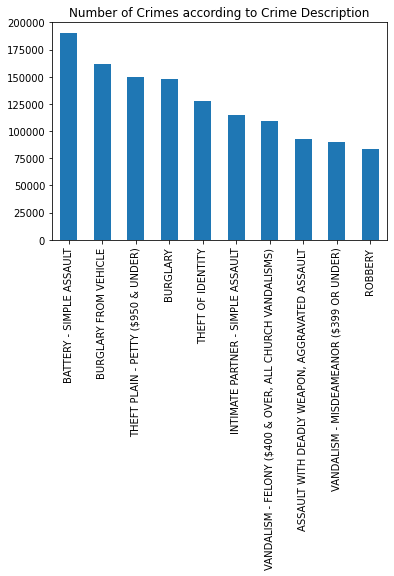

In [43]:
plt.title('Number of Crimes according to Crime Description')
crime_df['Crm Cd Desc'].value_counts()[:10].plot(kind='bar')

###### According to the Graph, BATTERY - SIMPLE ASSAULT has the Highest Crime Rate followed by BURGLARY FROM VEHICLE

### Crime and Area

In [44]:
area_crime = pd.concat(objs=[area, crime_df], axis=1)

In [45]:
# First, let's see total number of crimes in the Area ID 12 and 3.
print ("Number of Crimes in Area ID 12 i.e 77th Street", len(area_crime[(area_crime['AREA '] == 12)]))
print ("Number of Crimes in Area ID 3 i.e Southwest", len(area_crime[(area_crime['AREA '] == 3)]))

Number of Crimes in Area ID 12 i.e 77th Street 130042
Number of Crimes in Area ID 3 i.e Southwest 124364


In [46]:
# Select the Area with the ID 12 and 3 Respectively.
area_crime_12 = area_crime[(area_crime['AREA '] == 12)]
area_crime_3 = area_crime[(area_crime['AREA '] == 3)]

In [47]:
area_crime_12['Crm Cd Desc'].value_counts()[:10]

BATTERY - SIMPLE ASSAULT                                   15049
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT             11795
ROBBERY                                                    10248
INTIMATE PARTNER - SIMPLE ASSAULT                           9841
BURGLARY                                                    9595
BURGLARY FROM VEHICLE                                       7579
VANDALISM - MISDEAMEANOR ($399 OR UNDER)                    6917
THEFT PLAIN - PETTY ($950 & UNDER)                          6814
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)     6716
THEFT OF IDENTITY                                           6457
Name: Crm Cd Desc, dtype: int64

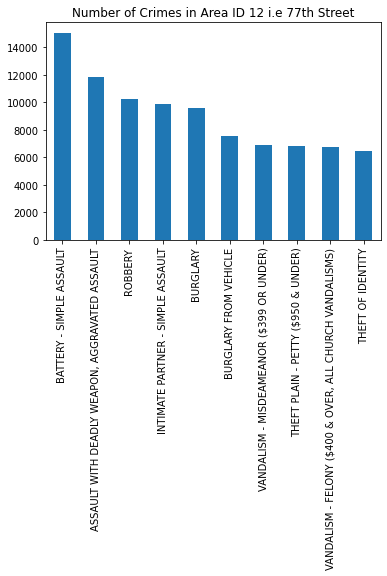

In [48]:
plt.title('Number of Crimes in Area ID 12 i.e 77th Street')
area_crime_12['Crm Cd Desc'].value_counts()[:10].plot(kind='bar')

In [49]:
area_crime_3['Crm Cd Desc'].value_counts()[:10]

BATTERY - SIMPLE ASSAULT                                   14095
THEFT PLAIN - PETTY ($950 & UNDER)                         11973
BURGLARY                                                    8409
BURGLARY FROM VEHICLE                                       8084
INTIMATE PARTNER - SIMPLE ASSAULT                           7612
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT              7386
ROBBERY                                                     7304
THEFT OF IDENTITY                                           6497
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)     6137
VANDALISM - MISDEAMEANOR ($399 OR UNDER)                    6115
Name: Crm Cd Desc, dtype: int64

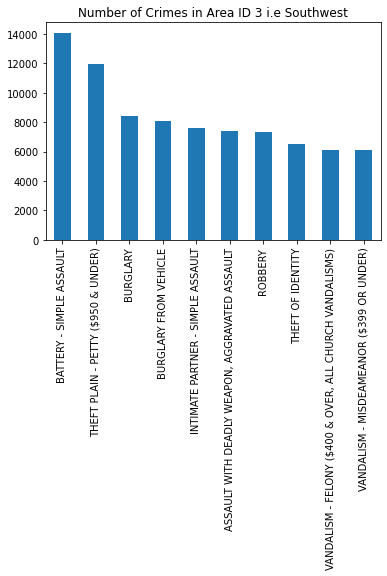

In [50]:
plt.title('Number of Crimes in Area ID 3 i.e Southwest')
area_crime_3['Crm Cd Desc'].value_counts()[:10].plot(kind='bar')

##### Both areas have Simple Assault at the TOP

## DateTime Exploration

In [51]:
crime.head()

,DR_NO,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,Date Reported,Time Reported,Date Occured,Time Occured,Year
0,1307355,1350,13,Newton,1385,2,900,VIOLATION OF COURT ORDER,0913 1814 2000,48,M,H,501.0,SINGLE FAMILY DWELLING,NaN,NaN,AA,Adult Arrest,900.0,NaN,NaN,NaN,300 E GAGE AV,NaN,33.9825,-118.2695,2010-02-20,1900-01-01 12:00:00,2010-02-20,1900-01-01 12:00:00,2010
1,11401303,45,14,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,38,M,W,101.0,STREET,NaN,NaN,IC,Invest Cont,740.0,NaN,NaN,NaN,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962,2010-09-13,1900-01-01 12:00:00,2010-09-12,1900-01-01 12:00:00,2010
2,70309629,1515,13,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,0344,38,M,H,103.0,ALLEY,NaN,NaN,IC,Invest Cont,946.0,NaN,NaN,NaN,1300 E 21ST ST,NaN,34.0224,-118.2524,2010-08-09,1900-01-01 12:00:00,2010-08-09,1900-01-01 12:00:00,2010
3,90631215,150,6,Hollywood,646,2,900,VIOLATION OF COURT ORDER,1100 0400 1402,47,F,W,101.0,STREET,102.0,HAND GUN,IC,Invest Cont,900.0,998.0,NaN,NaN,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295,2010-01-05,1900-01-01 12:00:00,2010-01-05,1900-01-01 12:00:00,2010
4,100100501,2100,1,Central,176,1,122,"RAPE, ATTEMPTED",0400,47,F,H,103.0,ALLEY,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,122.0,NaN,NaN,NaN,8TH ST,SAN PEDRO ST,34.0387,-118.2488,2010-01-03,1900-01-01 12:00:00,2010-01-02,1900-01-01 12:00:00,2010


In [52]:
# We extract the Hour of the occurrence of the crime
crime['TIME OCC'] = crime['TIME OCC'].astype(str).str.zfill(4)
crime['Hour Occurred'] = crime['TIME OCC'].apply(lambda t: int(t[:2]))

In [53]:
# Also, we compute the delta, in days, between the crime date and its reporting date
crime['Delta Report'] = (crime['Date Reported'] - crime['Date Occured']).dt.days

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


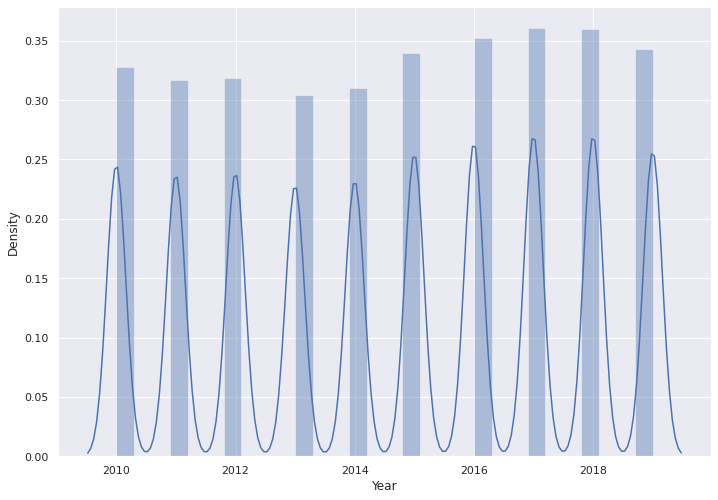

In [54]:
sns.set(rc={'figure.figsize':(11.7,8.27)}) # Seaborn visualization
sns.distplot(crime['Year'], bins=30) # distribution plot for output variable
plt.show()

#### We analyze crimes from 2015

In [55]:
crimes_from_15 = crime[(crime['Date Occured'] >= '01/01/2015')]
print(crimes_from_15.shape)
crimes_from_15.head()

(1011402, 33)


,DR_NO,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,Date Reported,Time Reported,Date Occured,Time Occured,Year,Hour Occurred,Delta Report
931429,150612028,2355,6,Hollywood,636,2,946,OTHER MISCELLANEOUS CRIME,1300,38,X,X,108.0,PARKING LOT,NaN,NaN,AA,Adult Arrest,946.0,NaN,NaN,NaN,HUDSON,YUCCA,34.1034,-118.3322,2015-05-04,1900-01-01 12:00:00,2015-05-04,1900-01-01 12:00:00,2015,23,0
933214,151315944,1740,13,Newton,1394,1,330,BURGLARY FROM VEHICLE,1609 0344 1309 0377,28,F,H,101.0,STREET,NaN,NaN,IC,Invest Cont,330.0,NaN,NaN,NaN,64TH,MAIN,33.9815,-118.2739,2015-08-05,1900-01-01 12:00:00,2015-08-05,1900-01-01 12:00:00,2015,17,0
999298,152005022,1415,20,Olympic,2055,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0907 0906 0319 1309 0302 1402 0326 0202 0342,28,F,H,101.0,STREET,102.0,HAND GUN,IC,Invest Cont,230.0,998.0,NaN,NaN,1000 S MARIPOSA AV,NaN,34.0526,-118.2989,2015-01-21,1900-01-01 12:00:00,2015-01-21,1900-01-01 12:00:00,2015,14,0
999299,151423417,1550,14,Pacific,1494,2,946,OTHER MISCELLANEOUS CRIME,2004 1402,38,X,X,212.0,TRANSPORTATION FACILITY (AIRPORT),NaN,NaN,AA,Adult Arrest,946.0,NaN,NaN,NaN,300 WORLD WAY,NaN,33.9440,-118.4073,2015-09-01,1900-01-01 12:00:00,2015-09-01,1900-01-01 12:00:00,2015,15,0
999300,151509046,0600,15,N Hollywood,1522,2,354,THEFT OF IDENTITY,0100,40,M,H,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,354.0,NaN,NaN,NaN,6500 COLDWATER CANYON AV,NaN,34.1936,-118.4166,2015-03-31,1900-01-01 12:00:00,2015-03-23,1900-01-01 12:00:00,2015,6,8


In [56]:
gr_count = crimes_from_15.groupby(['Crm Cd Desc'], as_index=['Crm Cd Desc']).count().iloc[:, 1]
print(gr_count)

Crm Cd Desc
ABORTION/ILLEGAL                                      4
ARSON                                              1944
ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER        837
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT    53556
ATTEMPTED ROBBERY                                  6238
                                                  ...  
VEHICLE - STOLEN                                    500
VIOLATION OF COURT ORDER                           8583
VIOLATION OF RESTRAINING ORDER                    11277
VIOLATION OF TEMPORARY RESTRAINING ORDER           1045
WEAPONS POSSESSION/BOMBING                           87
Name: TIME OCC, Length: 141, dtype: int64


In [57]:
# We select the most frequent crimes
selected_crimes_from_15 = gr_count[gr_count > 20000]
selected_names = selected_crimes_from_15.index
print("\n".join(selected_names))

ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT
BATTERY - SIMPLE ASSAULT
BURGLARY
BURGLARY FROM VEHICLE
CRIMINAL THREATS - NO WEAPON DISPLAYED
INTIMATE PARTNER - SIMPLE ASSAULT
ROBBERY
SHOPLIFTING - PETTY THEFT ($950 & UNDER)
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)
THEFT OF IDENTITY
THEFT PLAIN - PETTY ($950 & UNDER)
THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)
VANDALISM - MISDEAMEANOR ($399 OR UNDER)


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


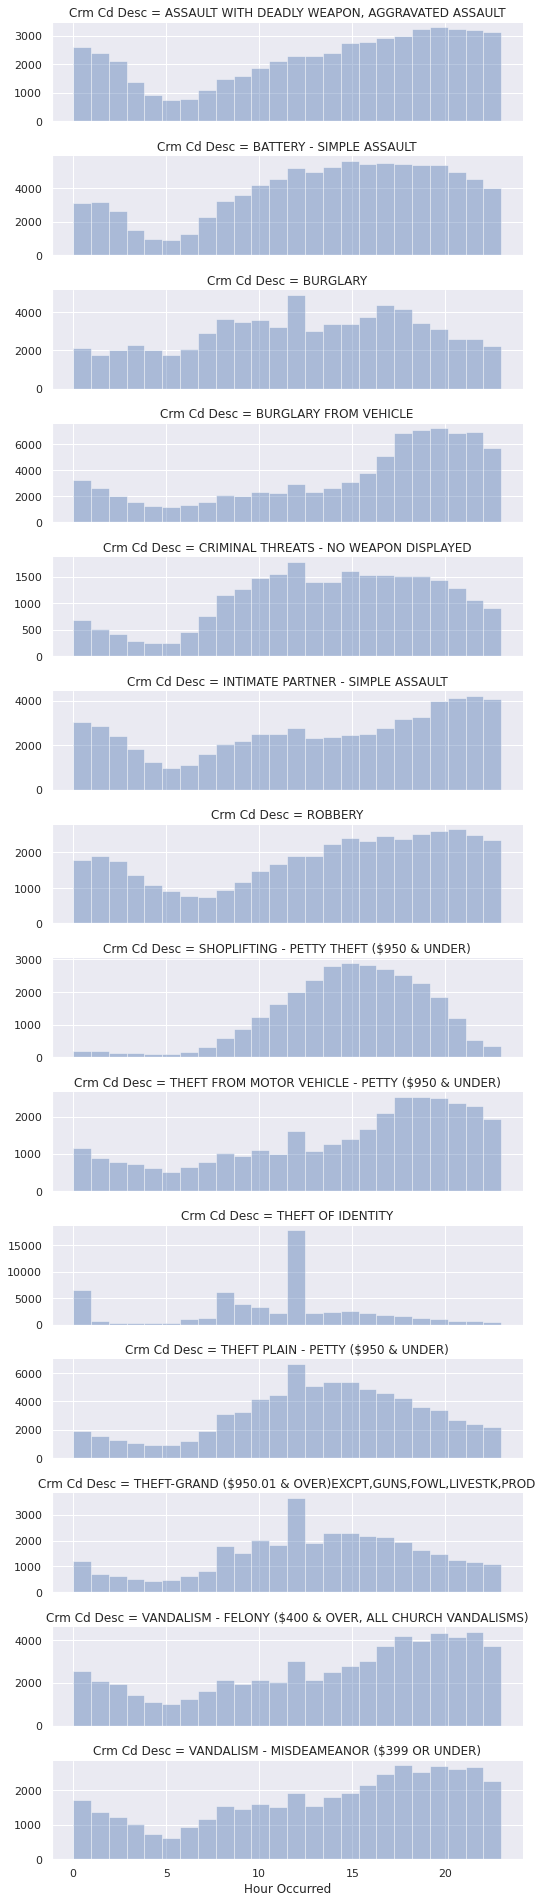

In [58]:
g = sns.FacetGrid(crimes_from_15, 
                  row="Crm Cd Desc", 
                  row_order=selected_names,
                  size=1.9, aspect=4, 
                  sharex=True,
                  sharey=False)

g.map(sns.distplot, "Hour Occurred", bins=24, kde=False, rug=False)

It's interesting to notice how Assaults and Vehicle Thefts happen mostly in the evening, while Petty thefts happen around noon. Burglaries tend to happen from morning to late afternoon

### Date of Crime Reported and Crime Occurred Visualization

In [59]:
# Making lists of days, months, and years for reported from datetime objects
day_reported = [d.isoweekday() for d in crime["Date Reported"]]
mon_reported = [d.month for d in crime["Date Reported"]]
year_reported = [d.year for d in crime["Date Reported"]]
# Making new columns for each
crime["Day Reported"] = np.array(day_reported)
crime["Month Reported"] = np.array(mon_reported)
crime["Year Reported"] = np.array(year_reported)

In [60]:
# Making lists of days, months, and years for occurred from datetime objects
day_occurred = [d.isoweekday() for d in crime["Date Occured"]]
mon_occurred = [d.month for d in crime["Date Occured"]]
year_occurred = [d.year for d in crime["Date Occured"]]
# Making new columns for each
crime["Day Occured"] = np.array(day_occurred)
crime["Month Occured"] = np.array(mon_occurred)
crime["Year Occured"] = np.array(year_occurred)

#### Crime by Day of the Week

In [61]:
# Making a new dataframe
df1 = pd.DataFrame({
    "Day" : list(crime["Day Reported"].value_counts().index),
    "Crime Occured" : list(crime["Day Occured"].value_counts()),
    "Crime Reported" : list(crime["Day Reported"].value_counts())
})
dayrepocc = df1.set_index("Day").stack().reset_index().rename(columns={"level_1" : "Variable", 0 : "Crime"})


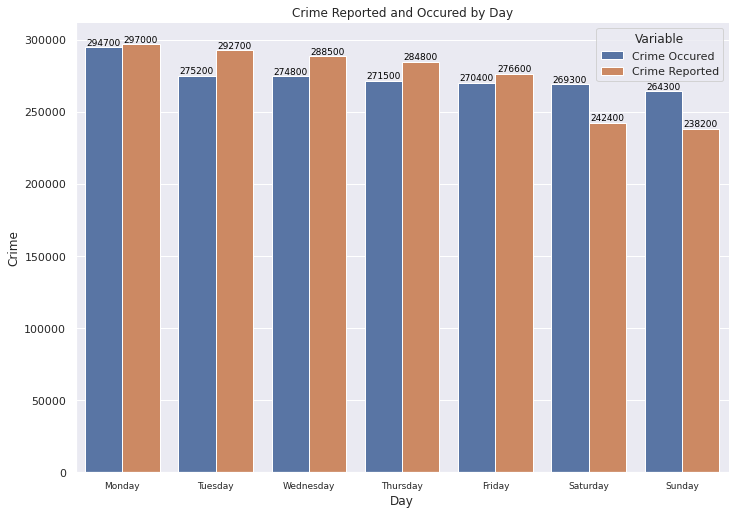

In [62]:
fig, ax = plt.subplots()
# Plotting side by side crime rep and occ by day
sns.barplot(x = "Day", y = "Crime", hue = "Variable", data=dayrepocc, ax=ax)
# Axes
ax.set_title("Crime Reported and Occured by Day")
ax.set_xticklabels(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], fontsize=9)
ax.set_ylabel("Crime")
# Adding values
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % round(int(p.get_height()), -2), 
            fontsize=9, color='black', ha='center', va='bottom')
sns.despine(fig)

#### Crime by Month

In [63]:
# Making a new dataframe
df2 = pd.DataFrame({
    "Month" : list(crime["Month Reported"].value_counts().index),
    "Crime Reported" : list(crime["Month Reported"].value_counts()),
    "Crime Occured" : list(crime["Month Occured"].value_counts())
})
monrepocc = df2.set_index("Month").stack().reset_index().rename(columns={"level_1" : "Variable", 0 : "Crime"})

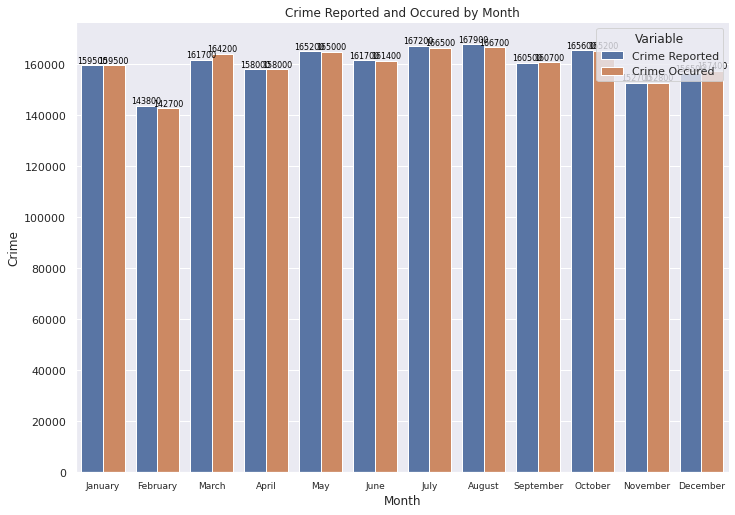

In [64]:
fig, ax = plt.subplots()
# Plotting side by side crime rep and occ by day
sns.barplot(x = "Month", y = "Crime", hue = "Variable", data=monrepocc, ax=ax)
# Axes
ax.set_title("Crime Reported and Occured by Month")
ax.set_xticklabels(["January", "February", "March", "April", "May", "June",
                    "July", "August", "September", "October", "November", "December"], fontsize=9)
ax.set_ylabel("Crime")
# Adding values
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % round(int(p.get_height()), -2), 
            fontsize=8, color='black', ha='center', va='bottom')
sns.despine(fig)

#### Crime by Year

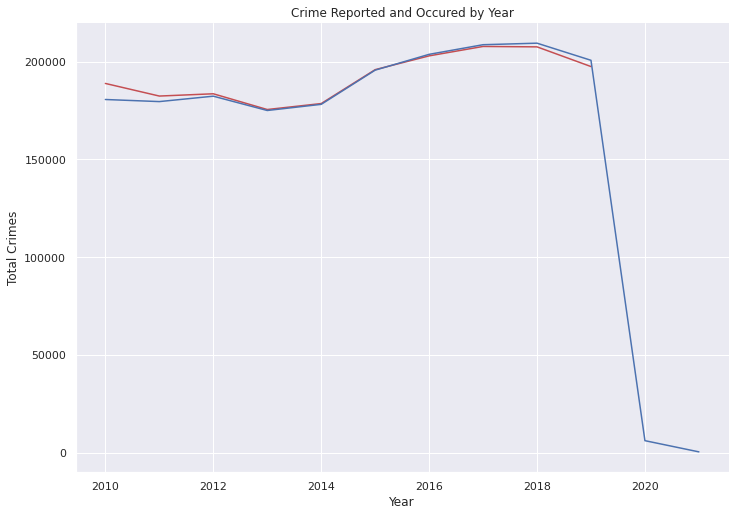

In [65]:
fig, ax = plt.subplots()
# Plotting crimes occured by year
plt.plot(crime["Year Occured"].value_counts().sort_index().index, crime["Year Occured"].value_counts().sort_index(), 'r')
plt.plot(crime["Year Reported"].value_counts().sort_index().index, crime["Year Reported"].value_counts().sort_index(), 'b')
# AXes
ax.set_title("Crime Reported and Occured by Year")
ax.set_xlabel("Year")
ax.set_ylabel("Total Crimes")
sns.despine()

In [66]:
crime.head()

,DR_NO,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,Date Reported,Time Reported,Date Occured,Time Occured,Year,Hour Occurred,Delta Report,Day Reported,Month Reported,Year Reported,Day Occured,Month Occured,Year Occured
0,1307355,1350,13,Newton,1385,2,900,VIOLATION OF COURT ORDER,0913 1814 2000,48,M,H,501.0,SINGLE FAMILY DWELLING,NaN,NaN,AA,Adult Arrest,900.0,NaN,NaN,NaN,300 E GAGE AV,NaN,33.9825,-118.2695,2010-02-20,1900-01-01 12:00:00,2010-02-20,1900-01-01 12:00:00,2010,13,0,6,2,2010,6,2,2010
1,11401303,0045,14,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,38,M,W,101.0,STREET,NaN,NaN,IC,Invest Cont,740.0,NaN,NaN,NaN,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962,2010-09-13,1900-01-01 12:00:00,2010-09-12,1900-01-01 12:00:00,2010,0,1,1,9,2010,7,9,2010
2,70309629,1515,13,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,0344,38,M,H,103.0,ALLEY,NaN,NaN,IC,Invest Cont,946.0,NaN,NaN,NaN,1300 E 21ST ST,NaN,34.0224,-118.2524,2010-08-09,1900-01-01 12:00:00,2010-08-09,1900-01-01 12:00:00,2010,15,0,1,8,2010,1,8,2010
3,90631215,0150,6,Hollywood,646,2,900,VIOLATION OF COURT ORDER,1100 0400 1402,47,F,W,101.0,STREET,102.0,HAND GUN,IC,Invest Cont,900.0,998.0,NaN,NaN,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295,2010-01-05,1900-01-01 12:00:00,2010-01-05,1900-01-01 12:00:00,2010,1,0,2,1,2010,2,1,2010
4,100100501,2100,1,Central,176,1,122,"RAPE, ATTEMPTED",0400,47,F,H,103.0,ALLEY,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,122.0,NaN,NaN,NaN,8TH ST,SAN PEDRO ST,34.0387,-118.2488,2010-01-03,1900-01-01 12:00:00,2010-01-02,1900-01-01 12:00:00,2010,21,1,7,1,2010,6,1,2010


### Premise Description

In [67]:
crime["Premis Desc"].value_counts()

SINGLE FAMILY DWELLING                          429428
STREET                                          330830
MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)    265827
PARKING LOT                                     119136
SIDEWALK                                        105726
                                                 ...  
MTA - ORANGE LINE - WOODMAN                          2
GREEN LINE (I-105 FWY LEVEL TRAIN)                   1
REDLINE SUBWAY TUNNEL                                1
NUCLEAR FACILITY                                     1
TACTICAL SIGNIFICANCE                                1
Name: Premis Desc, Length: 320, dtype: int64

In [68]:
crime['Premis Desc'].isnull().value_counts()

False    1919917
True         161
Name: Premis Desc, dtype: int64

In [69]:
# Droping Columns Premis Desc
crime = crime.dropna(subset=['Premis Desc'])
crime.head()

,DR_NO,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,Date Reported,Time Reported,Date Occured,Time Occured,Year,Hour Occurred,Delta Report,Day Reported,Month Reported,Year Reported,Day Occured,Month Occured,Year Occured
0,1307355,1350,13,Newton,1385,2,900,VIOLATION OF COURT ORDER,0913 1814 2000,48,M,H,501.0,SINGLE FAMILY DWELLING,NaN,NaN,AA,Adult Arrest,900.0,NaN,NaN,NaN,300 E GAGE AV,NaN,33.9825,-118.2695,2010-02-20,1900-01-01 12:00:00,2010-02-20,1900-01-01 12:00:00,2010,13,0,6,2,2010,6,2,2010
1,11401303,0045,14,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,38,M,W,101.0,STREET,NaN,NaN,IC,Invest Cont,740.0,NaN,NaN,NaN,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962,2010-09-13,1900-01-01 12:00:00,2010-09-12,1900-01-01 12:00:00,2010,0,1,1,9,2010,7,9,2010
2,70309629,1515,13,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,0344,38,M,H,103.0,ALLEY,NaN,NaN,IC,Invest Cont,946.0,NaN,NaN,NaN,1300 E 21ST ST,NaN,34.0224,-118.2524,2010-08-09,1900-01-01 12:00:00,2010-08-09,1900-01-01 12:00:00,2010,15,0,1,8,2010,1,8,2010
3,90631215,0150,6,Hollywood,646,2,900,VIOLATION OF COURT ORDER,1100 0400 1402,47,F,W,101.0,STREET,102.0,HAND GUN,IC,Invest Cont,900.0,998.0,NaN,NaN,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295,2010-01-05,1900-01-01 12:00:00,2010-01-05,1900-01-01 12:00:00,2010,1,0,2,1,2010,2,1,2010
4,100100501,2100,1,Central,176,1,122,"RAPE, ATTEMPTED",0400,47,F,H,103.0,ALLEY,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,122.0,NaN,NaN,NaN,8TH ST,SAN PEDRO ST,34.0387,-118.2488,2010-01-03,1900-01-01 12:00:00,2010-01-02,1900-01-01 12:00:00,2010,21,1,7,1,2010,6,1,2010


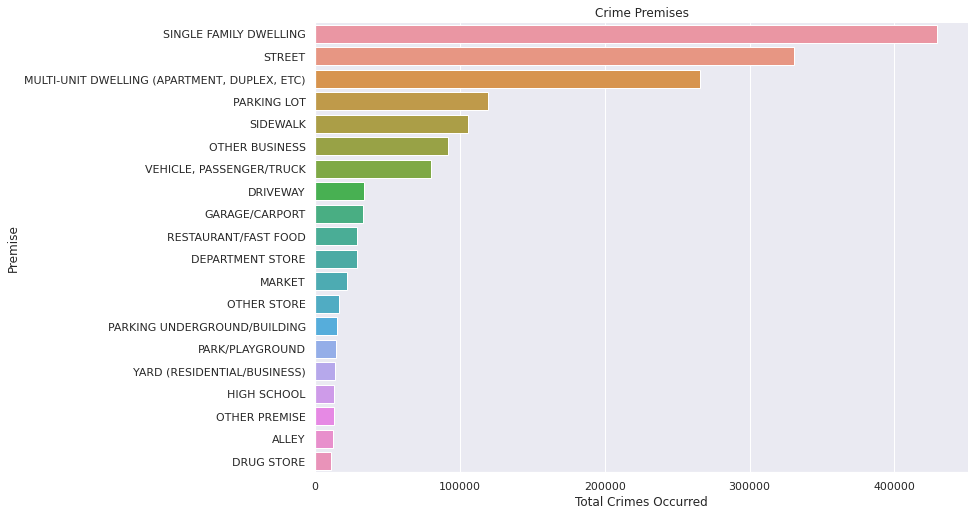

In [70]:
# We will only be looking at the top 20 premises
fig, ax = plt.subplots()
# Plotting top 20 premises
sns.barplot(y=crime["Premis Desc"].value_counts().head(20).index, x=crime["Premis Desc"].value_counts().head(20), ax=ax)
# Axes
ax.set_title("Crime Premises")
ax.set_xlabel("Total Crimes Occurred")
ax.set_ylabel("Premise")
sns.despine()

### Weapon Description

In [71]:
missvals = crime["Weapon Desc"].isnull().sum()
print("There are {} missing values".format(missvals))

There are 1209117 missing values


In [72]:
crime["Weapon Desc"].value_counts().head(10)

STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    431107
VERBAL THREAT                                      58660
UNKNOWN WEAPON/OTHER WEAPON                        57425
HAND GUN                                           34084
SEMI-AUTOMATIC PISTOL                              12892
KNIFE WITH BLADE 6INCHES OR LESS                   12832
OTHER KNIFE                                         9788
UNKNOWN FIREARM                                     7897
VEHICLE                                             7229
REVOLVER                                            5562
Name: Weapon Desc, dtype: int64

We assume that missing values are Weapon Desc is Missing Weapon.

In [73]:
crime['Weapon Desc'] = crime["Weapon Desc"].replace(np.nan, 'MISSING WEAPON')
crime["Weapon Desc"].value_counts().head(10)

MISSING WEAPON                                    1209117
STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)     431107
VERBAL THREAT                                       58660
UNKNOWN WEAPON/OTHER WEAPON                         57425
HAND GUN                                            34084
SEMI-AUTOMATIC PISTOL                               12892
KNIFE WITH BLADE 6INCHES OR LESS                    12832
OTHER KNIFE                                          9788
UNKNOWN FIREARM                                      7897
VEHICLE                                              7229
Name: Weapon Desc, dtype: int64

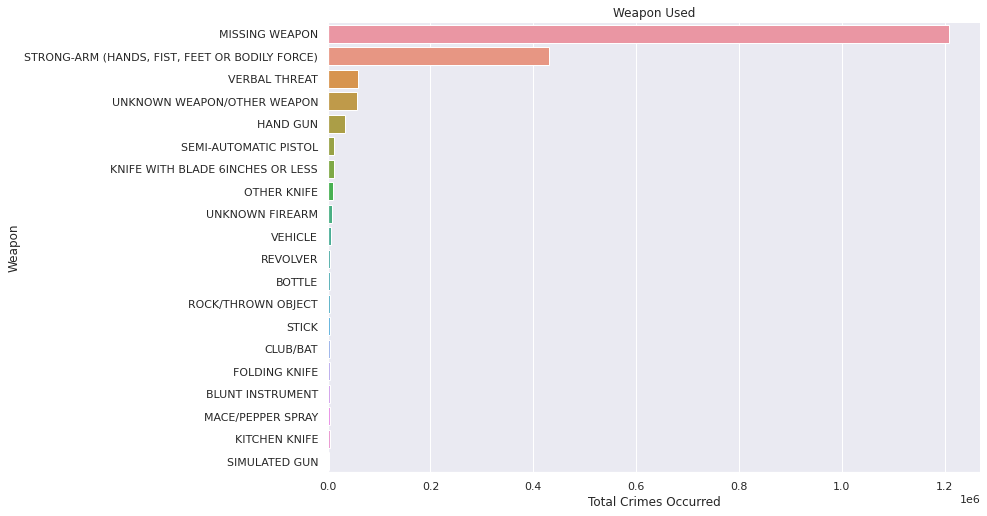

In [74]:
fig, ax = plt.subplots()
# Plotting weapons used
sns.barplot(y=crime["Weapon Desc"].value_counts().head(20).index, x=crime["Weapon Desc"].value_counts().head(20), ax=ax)
# Axes
ax.set_title("Weapon Used")
ax.set_xlabel("Total Crimes Occurred")
ax.set_ylabel("Weapon")
sns.despine()

### Status Description

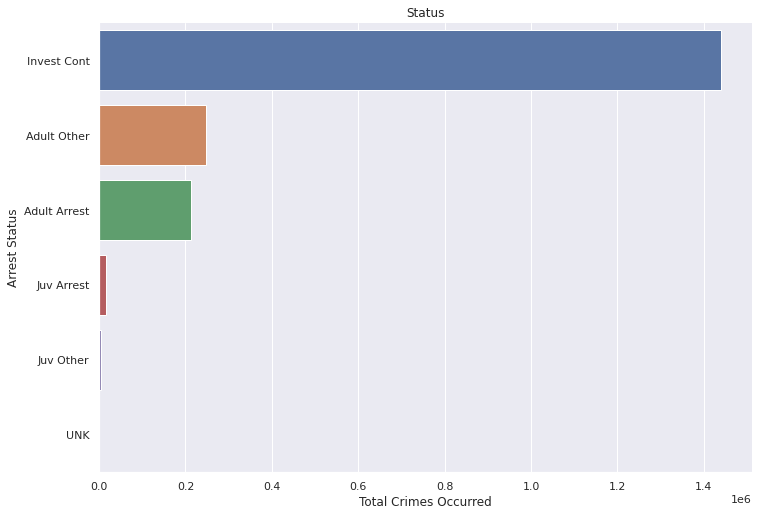

In [75]:
fig, ax = plt.subplots()
# Plotting the arrest status
sns.barplot(y=crime["Status Desc"].value_counts().index, x=crime["Status Desc"].value_counts(), ax=ax)
# Axes
ax.set_title("Status")
ax.set_xlabel("Total Crimes Occurred")
ax.set_ylabel("Arrest Status")
sns.despine()

### Certain genders victims for certain crimes

In [76]:
# Removing Entries for X and H and - (by elimination)
crime["Vict Gender"] = crime["Vict Sex"][crime["Vict Sex"] != "X"]
crime["Vict Gender"] = crime["Vict Gender"][crime["Vict Gender"] != "H"]
crime["Vict Gender"] = crime["Vict Gender"][crime["Vict Gender"] != "-"]

In [77]:
# Combining two columns into a dataframe
cc_vg = crime[["Crm Cd Desc", "Vict Gender"]]
# Dropping null values
cc_vg = cc_vg[pd.notnull(cc_vg["Vict Gender"])]

In [78]:
# Saving top 10 crimes
crimetop10 = cc_vg["Crm Cd Desc"].value_counts().head(10).index
# Choosing data that is included in the top 10 crimes (by selection)
crimecc = cc_vg.loc[cc_vg["Crm Cd Desc"].isin(crimetop10)]

In [79]:
# Group by Crime Code Description and Victim Gender
cc_gender = crimecc.groupby(["Crm Cd Desc", "Vict Gender"]).size().reset_index(name="Count")
cc_gender

,Crm Cd Desc,Vict Gender,Count
0,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",F,25254
1,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",M,67015
2,BATTERY - SIMPLE ASSAULT,F,98839
3,BATTERY - SIMPLE ASSAULT,M,91403
4,BURGLARY,F,58059
5,BURGLARY,M,82975
6,BURGLARY FROM VEHICLE,F,72058
7,BURGLARY FROM VEHICLE,M,89246
8,INTIMATE PARTNER - SIMPLE ASSAULT,F,91278
9,INTIMATE PARTNER - SIMPLE ASSAULT,M,23219


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


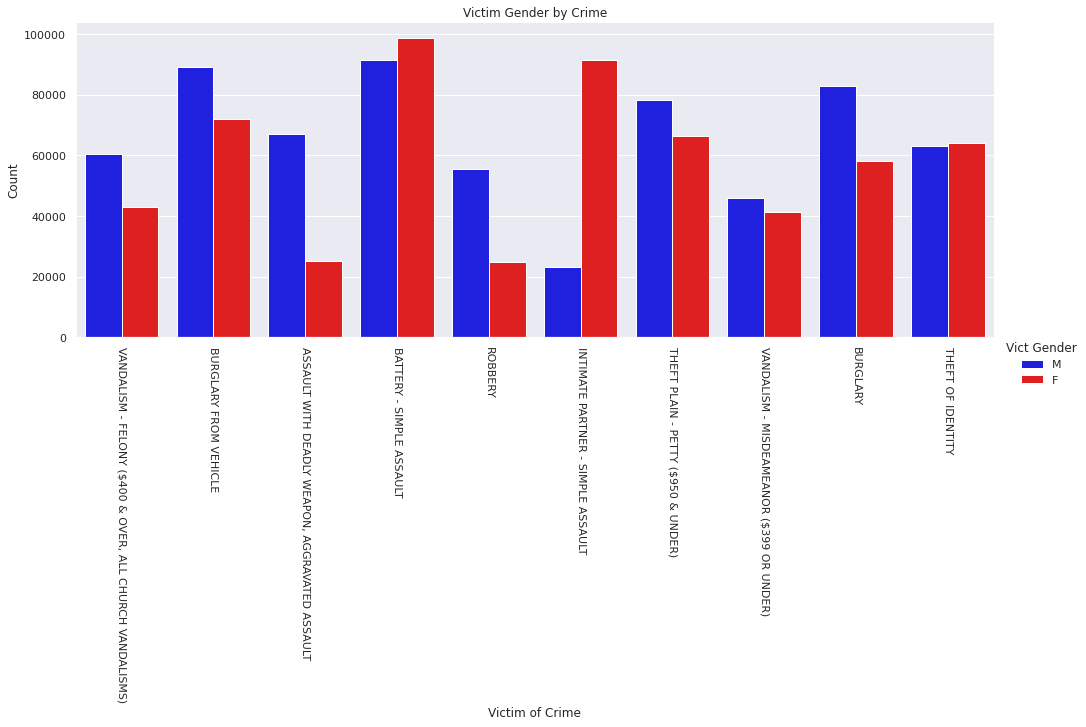

In [80]:
# Factorplot Crime and Gender based on count
ax = sns.factorplot(x="Crm Cd Desc", hue="Vict Gender", kind="count", data=crimecc, size=5, aspect=3, palette=["blue", "red"])
# Axes
plt.title("Victim Gender by Crime")
ax.set_xticklabels(rotation=-90)
ax.set_xlabels("Victim of Crime")
ax.set_ylabels("Count")
sns.despine()

In [81]:
crime.shape

(1919917, 40)

In [82]:
crime.head()

,DR_NO,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,Date Reported,Time Reported,Date Occured,Time Occured,Year,Hour Occurred,Delta Report,Day Reported,Month Reported,Year Reported,Day Occured,Month Occured,Year Occured,Vict Gender
0,1307355,1350,13,Newton,1385,2,900,VIOLATION OF COURT ORDER,0913 1814 2000,48,M,H,501.0,SINGLE FAMILY DWELLING,NaN,MISSING WEAPON,AA,Adult Arrest,900.0,NaN,NaN,NaN,300 E GAGE AV,NaN,33.9825,-118.2695,2010-02-20,1900-01-01 12:00:00,2010-02-20,1900-01-01 12:00:00,2010,13,0,6,2,2010,6,2,2010,M
1,11401303,0045,14,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,38,M,W,101.0,STREET,NaN,MISSING WEAPON,IC,Invest Cont,740.0,NaN,NaN,NaN,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962,2010-09-13,1900-01-01 12:00:00,2010-09-12,1900-01-01 12:00:00,2010,0,1,1,9,2010,7,9,2010,M
2,70309629,1515,13,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,0344,38,M,H,103.0,ALLEY,NaN,MISSING WEAPON,IC,Invest Cont,946.0,NaN,NaN,NaN,1300 E 21ST ST,NaN,34.0224,-118.2524,2010-08-09,1900-01-01 12:00:00,2010-08-09,1900-01-01 12:00:00,2010,15,0,1,8,2010,1,8,2010,M
3,90631215,0150,6,Hollywood,646,2,900,VIOLATION OF COURT ORDER,1100 0400 1402,47,F,W,101.0,STREET,102.0,HAND GUN,IC,Invest Cont,900.0,998.0,NaN,NaN,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295,2010-01-05,1900-01-01 12:00:00,2010-01-05,1900-01-01 12:00:00,2010,1,0,2,1,2010,2,1,2010,F
4,100100501,2100,1,Central,176,1,122,"RAPE, ATTEMPTED",0400,47,F,H,103.0,ALLEY,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,122.0,NaN,NaN,NaN,8TH ST,SAN PEDRO ST,34.0387,-118.2488,2010-01-03,1900-01-01 12:00:00,2010-01-02,1900-01-01 12:00:00,2010,21,1,7,1,2010,6,1,2010,F


# Predictions

In [83]:
crime['AREA '].unique()

array([13, 14,  6,  1, 11,  4,  3,  2, 20,  7, 12,  5, 18,  9, 10, 19,  8,
       21, 17, 16, 15])

In [84]:
crime['Vict Sex'].unique()

array(['M', 'F', 'X'], dtype=object)

In [85]:
crime['Vict Age'].unique()

array([48, 38, 47, 23, 46, 51, 30, 55, 40, 24, 29, 41, 11, 50, 18, 37, 28,
       25, 31, 36, 61, 27, 32, 45, 22, 35, 44, 20, 33, 26, 52, 62, 39, 54,
       76, 16, 21, 57, 34, 65,  5, 49, 58, 56, 59, 42,  9, 60, 92, 43, 19,
       15, 17, 63, 83,  6, 13, 12,  7, 53, 10, 99, 74, 84, 68, 82, 66, 64,
       14, 69, 70, 71, 73, 78, 67, 80, 81, 72, 86, 79, 75, 77,  2,  4,  8,
       93, 85,  3, 91, 89, 87, 90, 88, 96, 95, 97, 98, 94])

In [86]:
crime

,DR_NO,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,Date Reported,Time Reported,Date Occured,Time Occured,Year,Hour Occurred,Delta Report,Day Reported,Month Reported,Year Reported,Day Occured,Month Occured,Year Occured,Vict Gender
0,1307355,1350,13,Newton,1385,2,900,VIOLATION OF COURT ORDER,0913 1814 2000,48,M,H,501.0,SINGLE FAMILY DWELLING,NaN,MISSING WEAPON,AA,Adult Arrest,900.0,NaN,NaN,NaN,300 E GAGE AV,NaN,33.9825,-118.2695,2010-02-20,1900-01-01 12:00:00,2010-02-20,1900-01-01 12:00:00,2010,13,0,6,2,2010,6,2,2010,M
1,11401303,0045,14,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,38,M,W,101.0,STREET,NaN,MISSING WEAPON,IC,Invest Cont,740.0,NaN,NaN,NaN,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962,2010-09-13,1900-01-01 12:00:00,2010-09-12,1900-01-01 12:00:00,2010,0,1,1,9,2010,7,9,2010,M
2,70309629,1515,13,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,0344,38,M,H,103.0,ALLEY,NaN,MISSING WEAPON,IC,Invest Cont,946.0,NaN,NaN,NaN,1300 E 21ST ST,NaN,34.0224,-118.2524,2010-08-09,1900-01-01 12:00:00,2010-08-09,1900-01-01 12:00:00,2010,15,0,1,8,2010,1,8,2010,M
3,90631215,0150,6,Hollywood,646,2,900,VIOLATION OF COURT ORDER,1100 0400 1402,47,F,W,101.0,STREET,102.0,HAND GUN,IC,Invest Cont,900.0,998.0,NaN,NaN,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295,2010-01-05,1900-01-01 12:00:00,2010-01-05,1900-01-01 12:00:00,2010,1,0,2,1,2010,2,1,2010,F
4,100100501,2100,1,Central,176,1,122,"RAPE, ATTEMPTED",0400,47,F,H,103.0,ALLEY,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,122.0,NaN,NaN,NaN,8TH ST,SAN PEDRO ST,34.0387,-118.2488,2010-01-03,1900-01-01 12:00:00,2010-01-02,1900-01-01 12:00:00,2010,21,1,7,1,2010,6,1,2010,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2116838,190506304,0840,5,Harbor,569,2,627,CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT,0443 0419 0416 1259,14,F,W,109.0,PARK/PLAYGROUND,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,627.0,NaN,NaN,NaN,100 W 22ND ST,NaN,33.7257,-118.2801,2019-02-22,1900-01-01 12:00:00,2019-02-22,1900-01-01 12:00:00,2019,8,0,5,2,2019,5,2,2019,F
2116839,190608903,0400,6,Hollywood,644,1,648,ARSON,0601 1501,38,X,X,706.0,SEX ORIENTED/BOOK STORE/STRIP CLUB/GENTLEMAN'S...,506.0,FIRE,IC,Invest Cont,648.0,NaN,NaN,NaN,1400 N LA BREA AV,NaN,34.0962,-118.3490,2019-03-28,1900-01-01 12:00:00,2019-03-28,1900-01-01 12:00:00,2019,4,0,4,3,2019,4,3,2019,NaN
2116840,190715222,1810,7,Wilshire,701,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($400 AND OVER),1300 0344,40,M,W,101.0,STREET,NaN,MISSING WEAPON,IC,Invest Cont,331.0,NaN,NaN,NaN,WILLOUGHBY AV,ORLANDO AV,34.0871,-118.3732,2019-08-15,1900-01-01 12:00:00,2019-08-14,1900-01-01 12:00:00,2019,18,1,4,8,2019,3,8,2019,M
2116841,192004409,2100,20,Olympic,2029,2,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,0432 0421 0340 0305 0444 0429 0537 1218 0216,46,F,B,102.0,SIDEWALK,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,930.0,NaN,NaN,NaN,6TH,VIRGIL,34.0637,-118.2870,2019-01-06,1900-01-01 12:00:00,2019-01-06,1900-01-01 12:00:00,2019,21,0,7,1,2019,7,1,2019,F


In [87]:
crime.columns

Index(['DR_NO', 'TIME OCC', 'AREA ', 'AREA NAME', 'Rpt Dist No', 'Part 1-2',
       'Crm Cd', 'Crm Cd Desc', 'Mocodes', 'Vict Age', 'Vict Sex',
       'Vict Descent', 'Premis Cd', 'Premis Desc', 'Weapon Used Cd',
       'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1', 'Crm Cd 2',
       'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT', 'LON',
       'Date Reported', 'Time Reported', 'Date Occured', 'Time Occured',
       'Year', 'Hour Occurred', 'Delta Report', 'Day Reported',
       'Month Reported', 'Year Reported', 'Day Occured', 'Month Occured',
       'Year Occured', 'Vict Gender'],
      dtype='object')

In [88]:
encode_label = preprocessing.LabelEncoder()
print('After label Encoding \n')
crime['Vict Sex'] = encode_label.fit_transform( crime['Vict Sex'] )
crime['Vict Sex'].value_counts()

label_mapping = dict(zip(encode_label.classes_, encode_label.transform(encode_label.classes_)))
label_mapping

After label Encoding 



{'F': 0, 'M': 1, 'X': 2}

In [89]:
print('After label Encoding \n')
crime['Vict Descent'] = encode_label.fit_transform( crime['Vict Descent'] )
crime['Vict Descent'].value_counts()

label_mapping = dict(zip(encode_label.classes_, encode_label.transform(encode_label.classes_)))
label_mapping

After label Encoding 



{'-': 0,
 'A': 1,
 'B': 2,
 'C': 3,
 'D': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'O': 12,
 'P': 13,
 'S': 14,
 'U': 15,
 'V': 16,
 'W': 17,
 'X': 18,
 'Z': 19}

In [90]:
print('After label Encoding \n')
crime['Premis Desc'] = encode_label.fit_transform( crime['Premis Desc'] )
crime['Premis Desc'].value_counts()

label_mapping = dict(zip(encode_label.classes_, encode_label.transform(encode_label.classes_)))
label_mapping

After label Encoding 



{'7TH AND METRO CENTER (NOT LINE SPECIFIC)': 0,
 'ABANDONED BUILDING ABANDONED HOUSE': 1,
 'ABATEMENT LOCATION': 2,
 'ABORTION CLINIC/ABORTION FACILITY*': 3,
 'AIRCRAFT': 4,
 'ALLEY': 5,
 'AMTRAK TRAIN': 6,
 'AMUSEMENT PARK*': 7,
 'APARTMENT/CONDO COMMON LAUNDRY ROOM': 8,
 'ARCADE,GAME ROOM/VIDEO GAMES (EXAMPLE CHUCKIE CHEESE)*': 9,
 'AUTO DEALERSHIP (CHEVY, FORD, BMW, MERCEDES, ETC.)': 10,
 'AUTO REPAIR SHOP': 11,
 'AUTO SALES LOT': 12,
 'AUTO SUPPLY STORE*': 13,
 'AUTOMATED TELLER MACHINE (ATM)': 14,
 'BALCONY*': 15,
 'BANK': 16,
 'BANK DROP BOX/MONEY DROP-OUTSIDE OF BANK*': 17,
 'BANKING INSIDE MARKET-STORE *': 18,
 'BAR/COCKTAIL/NIGHTCLUB': 19,
 'BAR/SPORTS BAR (OPEN DAY & NIGHT)': 20,
 'BASKETBALL COURTS': 21,
 'BEACH': 22,
 'BEAUTY SUPPLY STORE': 23,
 'BEAUTY/BARBER SHOP': 24,
 'BLUE LINE (ABOVE GROUND SURFACE TRAIN)': 25,
 'BOOK STORE': 26,
 'BOWLING ALLEY*': 27,
 'BUS DEPOT/TERMINAL, OTHER THAN MTA': 28,
 'BUS STOP': 29,
 'BUS STOP/LAYOVER (ALSO QUERY 124)': 30,
 'BUS, SCHOOL, 

In [91]:
print('After label Encoding \n')
crime['Status Desc'] = encode_label.fit_transform( crime['Status Desc'] )
crime['Status Desc'].value_counts()

label_mapping = dict(zip(encode_label.classes_, encode_label.transform(encode_label.classes_)))
target_label_map = label_mapping
target_label_map

After label Encoding 



{'Adult Arrest': 0,
 'Adult Other': 1,
 'Invest Cont': 2,
 'Juv Arrest': 3,
 'Juv Other': 4,
 'UNK': 5}

In [92]:
print('After label Encoding \n')
crime['Weapon Desc'] = encode_label.fit_transform( crime['Weapon Desc'] )
crime['Weapon Desc'].value_counts()

label_mapping = dict(zip(encode_label.classes_, encode_label.transform(encode_label.classes_)))
label_mapping

After label Encoding 



{'AIR PISTOL/REVOLVER/RIFLE/BB GUN': 0,
 'ANTIQUE FIREARM': 1,
 'ASSAULT WEAPON/UZI/AK47/ETC': 2,
 'AUTOMATIC WEAPON/SUB-MACHINE GUN': 3,
 'AXE': 4,
 'BELT FLAILING INSTRUMENT/CHAIN': 5,
 'BLACKJACK': 6,
 'BLUNT INSTRUMENT': 7,
 'BOARD': 8,
 'BOMB THREAT': 9,
 'BOTTLE': 10,
 'BOW AND ARROW': 11,
 'BOWIE KNIFE': 12,
 'BRASS KNUCKLES': 13,
 'CAUSTIC CHEMICAL/POISON': 14,
 'CLEAVER': 15,
 'CLUB/BAT': 16,
 'CONCRETE BLOCK/BRICK': 17,
 'DEMAND NOTE': 18,
 'DIRK/DAGGER': 19,
 'DOG/ANIMAL (SIC ANIMAL ON)': 20,
 'EXPLOXIVE DEVICE': 21,
 'FIRE': 22,
 'FIXED OBJECT': 23,
 'FOLDING KNIFE': 24,
 'GLASS': 25,
 'HAMMER': 26,
 'HAND GUN': 27,
 'HECKLER & KOCH 91 SEMIAUTOMATIC ASSAULT RIFLE': 28,
 'HECKLER & KOCH 93 SEMIAUTOMATIC ASSAULT RIFLE': 29,
 'ICE PICK': 30,
 'KITCHEN KNIFE': 31,
 'KNIFE WITH BLADE 6INCHES OR LESS': 32,
 'KNIFE WITH BLADE OVER 6 INCHES IN LENGTH': 33,
 'LIQUOR/DRUGS': 34,
 'M-14 SEMIAUTOMATIC ASSAULT RIFLE': 35,
 'M1-1 SEMIAUTOMATIC ASSAULT RIFLE': 36,
 'MAC-10 SEMIAUTOMATIC A

In [93]:
x = crime[['Crm Cd','Weapon Desc','Vict Age','Vict Sex','Vict Descent','Premis Desc','AREA ' ,'LAT', 'LON']].values
y = crime[['Status Desc']].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [94]:
y_train = y_train.reshape( ( len(y_train), ) )

y_test = y_test.reshape( ( len(y_test), ) )


nb = GaussianNB()


# training the model
nb.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [95]:
y_prdnb = nb.predict(x_test)
acc = accuracy_score(y_test,y_prdnb)
print(acc)
cr = classification_report(y_test,y_prdnb)
print(cr)
target_label_map

0.7390915593705293


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.21      0.00      0.01     63557
           1       0.30      0.11      0.16     74434
           2       0.76      0.97      0.85    431741
           3       0.00      0.00      0.00      4588
           4       0.00      0.00      0.00      1648
           5       0.00      0.00      0.00         8

    accuracy                           0.74    575976
   macro avg       0.21      0.18      0.17    575976
weighted avg       0.63      0.74      0.66    575976



{'Adult Arrest': 0,
 'Adult Other': 1,
 'Invest Cont': 2,
 'Juv Arrest': 3,
 'Juv Other': 4,
 'UNK': 5}

In [96]:
lr = LogisticRegression(multi_class="ovr",max_iter=1000)
lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [97]:
y_prdlr = lr.predict(x_test)
acc = accuracy_score(y_test,y_prdlr)
print(acc)
cr = classification_report(y_test,y_prdlr)
print(cr)

0.7458765643012903


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00     63557
           1       0.32      0.06      0.10     74434
           2       0.76      0.98      0.86    431741
           3       0.00      0.00      0.00      4588
           4       0.00      0.00      0.00      1648
           5       0.00      0.00      0.00         8

    accuracy                           0.75    575976
   macro avg       0.18      0.17      0.16    575976
weighted avg       0.61      0.75      0.65    575976

